In [1]:
# Granger Causality Test
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.stats.diagnostic import unitroot_adf
from sklearn import preprocessing

In [2]:
path = ''

filename = 'data/output_populations_3-1000-d-l.csv'
filename2 = 'data/output_pops_E.csv'
st = 100
ed = 1000

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

dfIt = df['iteration']
dfS_1 = df['1']
dfS_2 = df['2']
dfS_3 = df['3']
# dfS_4 = df['4']
# dfS_5 = df['5']

df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2, 'species_3': dfS_3})

# df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2, 'species_3': dfS_3, 'species_4': dfS_4, 'species_5': dfS_5})
#col_names = df.columns

print(df.head(10))

iteration  species_1  species_2  species_3
100        101      16009      44330      16006
101        102      15402      46855      15357
102        103      14836      49025      14833
103        104      14525      49652      14536
104        105      14144      50390      14212
105        106      13836      50574      13916
106        107      13356      52003      13398
107        108      13028      52481      13098
108        109      12571      53214      12660
109        110      12089      54491      12186


In [3]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 or df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -3.818073
p-Value                   0.002728
#Lags used               15.000000
Observ used             884.000000
Critical Value (1%)      -3.437769
Critical Value (5%)      -2.864815
Critical Value (10%)     -2.568514
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=151.2886, p=0.0000  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=151.7952, p=0.0000  , df=1
likelihood ratio test: chi2=140.2615, p=0.0000  , df=1
parameter F test:         F=151.2886, p=0.0000  , df_denom=896, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=237.0392, p=0.0000  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=237.8329, p=0.0000  , df=1
likelihood ratio test: chi2=211.0119, p=0.0000  , df=1
parameter F test:         F=237.0392, p=0.0000  , df_denom=896, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0582  , p=0.8094  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=0.0584  , p=0.8090  , df=1
likelihood ratio test: chi2=0.0584  , p=0.8090  , df=1
parameter F test:         F=0.0582  , p=0.8094  , df_denom=896, df_num=1


3 eats 1?

Granger Causality
number of lags (no zero) 1


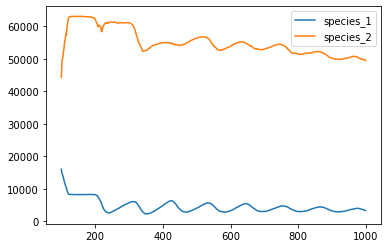

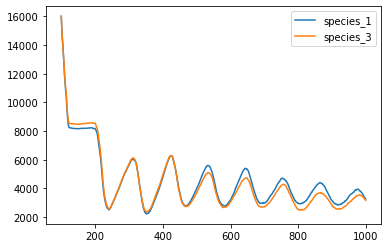

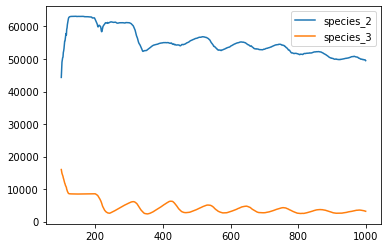

In [4]:
maxlag = [1]
def GCT(dataframe):
    print('\n\n1 eats 2?')
    grangercausalitytests(dataframe[['species_1', 'species_2']], maxlag=maxlag)
    print('\n\n2 eats 1?')
    grangercausalitytests(dataframe[['species_2', 'species_1']], maxlag=maxlag)
    dataframe[['species_1', 'species_2']].plot()

    print('\n\n1 eats 3?')
    grangercausalitytests(dataframe[['species_1', 'species_3']], maxlag=maxlag)
    print('\n\n3 eats 1?')
    grangercausalitytests(dataframe[['species_3', 'species_1']], maxlag=maxlag)
    dataframe[['species_1', 'species_3']].plot()

    print('\n\n2 eats 3?')
    grangercausalitytests(dataframe[['species_2', 'species_3']], maxlag=maxlag)
    print('\n\n3 eats 2?')
    grangercausalitytests(dataframe[['species_3', 'species_2']], maxlag=maxlag)
    dataframe[['species_2', 'species_3']].plot()

    # 'SSR' = Residual Sum of Squares
    # 'SSR based F test' and 'parameter F test' turn out to be the same and is what R reports (and is verified against R, IIRC).
    # statsmodels.tsa.stattools.grangercausalitytests uses the degrees of freedom definition for a single ordinary least square (OLS) estimate. 
    # works only for bivariate case.
    # 'SSR based F test' compares SSR between restricted and unrestricted model
    # 'parameter F test' builds a restriction matrix and uses the f_test of the unrestricted results instance.
    # 'parameter F test', 'SSR based F test' are based on F distribution
    # 'ssr based chi2 test', 'likelihood ratio test' are based on chi-square distribution

GCT(df)

species_1  species_2  species_3
0   5.804369  -2.728084   5.481563
1   5.497091  -2.091354   5.175579
2   5.210569  -1.544145   4.928530
3   5.053134  -1.386035   4.788503
4   4.860262  -1.199933   4.635747
5   4.704346  -1.153534   4.496192
6   4.461358  -0.793183   4.251971
7   4.295317  -0.672646   4.110531
8   4.063973  -0.487805   3.904027
9   3.819973  -0.165784   3.680551


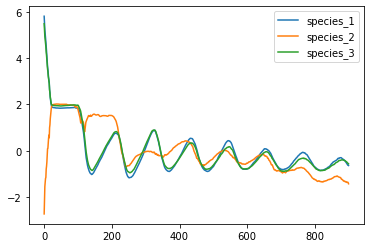

In [5]:
# Standardisation

# Create the Scaler object
scaler = preprocessing.StandardScaler()
test = df.drop(columns=['iteration'])
scaled_df = scaler.fit_transform(test)
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

print(scaled_df.head(10))
scaled_df[['species_1','species_2','species_3']].plot()

species_1  species_2  species_3
100   9.680906  10.699417   9.680719
101   9.642253  10.754813   9.639327
102   9.604812  10.800086   9.604610
103   9.583627  10.812794   9.584384
104   9.557046  10.827548   9.561842
105   9.535029  10.831193   9.540795
106   9.499721  10.859057   9.502861
107   9.474856  10.868206   9.480215
108   9.439148  10.882077   9.446203
109   9.400051  10.905791   9.408043


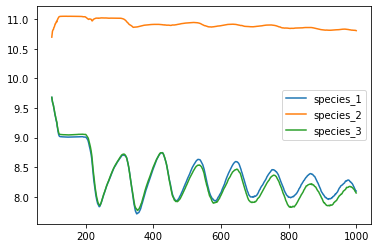

In [6]:
# Log-Transformation

logged_df = np.log(test)
print(logged_df.head(10))
logged_df[['species_1','species_2','species_3']].plot()

In [7]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(scaled_df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 or df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -3.818073
p-Value                   0.002728
#Lags used               15.000000
Observ used             884.000000
Critical Value (1%)      -3.437769
Critical Value (5%)      -2.864815
Critical Value (10%)     -2.568514
dtype: float64
p-Value < 0.05 (5.0e-2):  True
Test Statistics < Critical Value (1%):  True
The given series data is stable for Granger Test




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=151.2886, p=0.0000  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=151.7952, p=0.0000  , df=1
likelihood ratio test: chi2=140.2615, p=0.0000  , df=1
parameter F test:         F=151.2886, p=0.0000  , df_denom=896, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=237.0392, p=0.0000  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=237.8329, p=0.0000  , df=1
likelihood ratio test: chi2=211.0119, p=0.0000  , df=1
parameter F test:         F=237.0392, p=0.0000  , df_denom=896, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0582  , p=0.8094  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=0.0584  , p=0.8090  , df=1
likelihood ratio test: chi2=0.0584  , p=0.8090  , df=1
parameter F test:         F=0.0582  , p=0.8094  , df_denom=896, df_num=1


3 eats 1?

Granger Causality
number of lags (no zero) 1


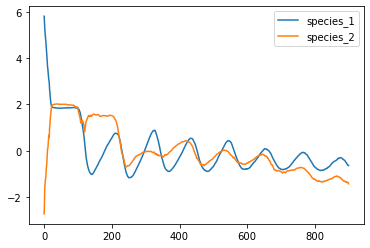

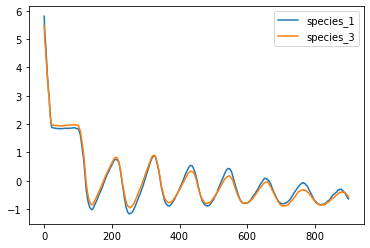

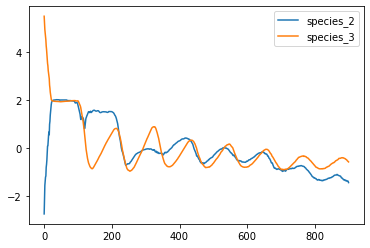

In [8]:
GCT(scaled_df)



1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=40.7114 , p=0.0000  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=40.8477 , p=0.0000  , df=1
likelihood ratio test: chi2=39.9469 , p=0.0000  , df=1
parameter F test:         F=40.7114 , p=0.0000  , df_denom=896, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=103.8832, p=0.0000  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=104.2311, p=0.0000  , df=1
likelihood ratio test: chi2=98.6186 , p=0.0000  , df=1
parameter F test:         F=103.8832, p=0.0000  , df_denom=896, df_num=1


1 eats 3?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.5574  , p=0.0106  , df_denom=896, df_num=1
ssr based chi2 test:   chi2=6.5793  , p=0.0103  , df=1
likelihood ratio test: chi2=6.5553  , p=0.0105  , df=1
parameter F test:         F=6.5574  , p=0.0106  , df_denom=896, df_num=1


3 eats 1?

Granger Causality
number of lags (no zero) 1


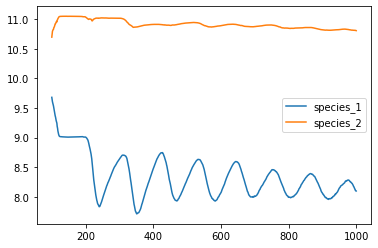

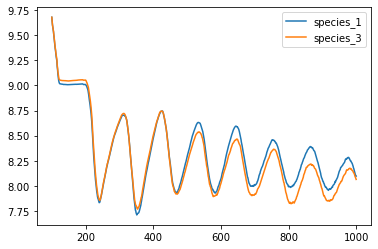

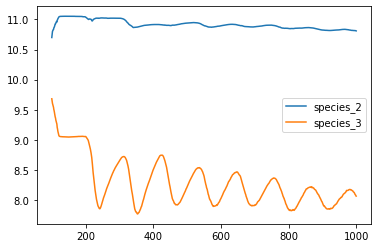

In [9]:
GCT(logged_df)

species_1  species_2  species_3
0    5.804369  -2.728084   5.481563
10   3.631658   0.088655   3.524495
20   2.049204   1.684891   2.111973
30   1.858358   2.002373   1.949316
40   1.842159   2.011956   1.942716
50   1.836084   2.002121   1.931872
60   1.846715   2.005147   1.946487
70   1.851777   1.978417   1.955445
80   1.855827   1.970347   1.969589
90   1.870001   1.940844   1.980905


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=24.2262 , p=0.0000  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=25.0713 , p=0.0000  , df=1
likelihood ratio test: chi2=22.0886 , p=0.0000  , df=1
parameter F test:         F=24.2262 , p=0.0000  , df_denom=86, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=52.5846 , p=0.0000  , df_denom=86, df_num=1
ssr based chi2 test:   chi2=54.4189 , p=0.0000  , df=1
likelihood ratio test: chi2=42.4649 , p=0.0000  , df=1
parameter F test:         F=52.5846 , p=0.0000  , df_den

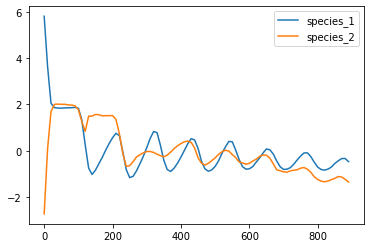

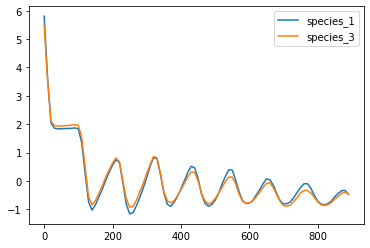

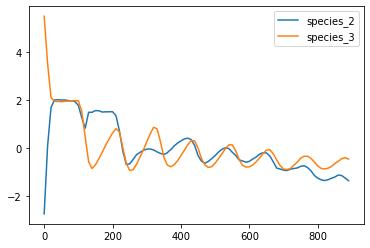

In [10]:
df_10 = scaled_df.filter(items=[i for i in range(ed-st) if i%10==0], axis=0)
#df_10.reset_index(inplace=True)
print(df_10.head(10))
GCT(df_10)

species_1  species_2  species_3
0     5.804369  -2.728084   5.481563
50    1.836084   2.002121   1.931872
100   1.837603   1.776933   1.966761
150  -0.836775   1.564354  -0.687610
200   0.560907   1.517198   0.632503
250  -1.158733  -0.645664  -0.920516
300   0.130111  -0.036169   0.267586
350  -0.419647  -0.262870  -0.366069
400  -0.271324   0.307539  -0.306192
450   0.098219  -0.304226   0.007335


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0115  , p=0.9160  , df_denom=14, df_num=1
ssr based chi2 test:   chi2=0.0140  , p=0.9057  , df=1
likelihood ratio test: chi2=0.0140  , p=0.9058  , df=1
parameter F test:         F=0.0115  , p=0.9160  , df_denom=14, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.1872 , p=0.0013  , df_denom=14, df_num=1
ssr based chi2 test:   chi2=19.6559 , p=0.0000  , df=1
likelihood ratio test: chi2=13.0621 , p=0.0003  , df=1
parameter F test:         F=16.1872 , p=0.0013

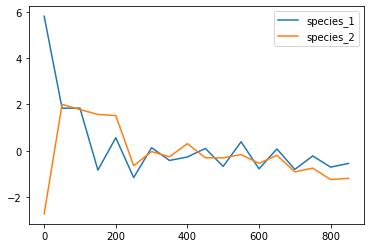

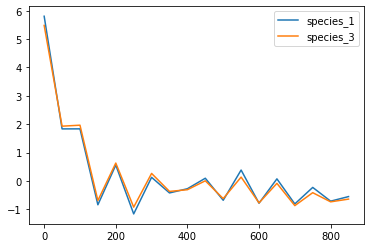

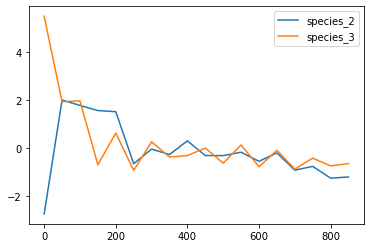

In [11]:
df_50 = scaled_df.filter(items=[i for i in range(ed-st) if i%50==0], axis=0)
#df_50.reset_index(inplace=True)
print(df_50.head(10))
GCT(df_50)